# <center><font color="blue">Bakti AI 2024</font></center>

<center> <img alt="" src="images/logo-bakti.png"/> </center>

* Instrumen Pengukur Dampak Internet Terhadap Ekonomi
* Instrumen Pengukur Dampak Internet Terhadap Sosial
* Instrumen Pengukur Dampak Internet Terhadap Pendidikan (Siswa)
* Instrumen Pengukur Dampak Internet Terhadap Pendidikan (Guru Atau Pengelola Sekolah)
* Instrumen Pengukur Dampak Internet Terhadap Kesehatan

# <center><font color="blue">Loading Seluruh Data</font></center>

In [1]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

In [2]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

ekonomi_ = "data/ekonomi.csv"
sosial_ = "data/sosial.csv"
guru_ = 'data/guru.csv'
murid_ = 'data/siswa.csv'
kesehatan_ = 'data/kesehatan.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfE = pd.read_csv(ekonomi_)
    dfS = pd.read_csv(sosial_)
    dfG = pd.read_csv(guru_)
    dfM = pd.read_csv(murid_)
    dfK = pd.read_csv(kesehatan_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/bakti2024/master/{ekonomi_}
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/bakti2024/master/{sosial_}
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/bakti2024/master/{guru_}
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/bakti2024/master/{siswa_}
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/bakti2024/master/{kesehatan_}
    dfE = pd.read_csv(ekonomi_)
    dfS = pd.read_csv(sosial_)
    dfG = pd.read_csv(guru_)
    dfM = pd.read_csv(murid_)
    dfK = pd.read_csv(kesehatan_)
    
print(dfE.shape, dfS.shape, dfG.shape, dfS.shape, dfK.shape)
dfE.sample(5)

(14, 42) (98, 73) (546, 27) (98, 73) (177, 29)


,Timestamp,Nama,Umur,Jenis Kelamin,Tingkat Pendidikan,Jenis UMKM,Provinsi Lokasi UMKM,Kabupaten/Kota Lokasi UMKM,Apakah anda punya perangkat elektronik?,Perangkat yang Anda gunakan untuk mengakses internet?,...,Melakukan promosi lebih luas dan efektif:,Meningkatkan jumlah pelanggan:.1,Apakah Anda menggunakan aplikasi atau platform berikut untuk meningkatkan produktivitas usaha? (Pilih semua yang sesuai),Akses internet meningkatkan efisiensi operasional usaha saya,Akses internet mempermudah saya mengelola pemasaran produk,Akses internet mendukung inovasi produk yang saya hasilkan,Apa kendala utama Anda dalam memanfaatkan internet untuk kegiatan UMKM? (Pilih semua yang sesuai),Apakah Anda pernah mengikuti pelatihan digital marketing atau e-commerce?,Apakah Anda merasa memerlukan pelatihan lebih lanjut tentang penggunaan internet untuk UMKM?,Apakah keberadaan internet memotivasi Anda untuk mengembangkan produk/jasa baru?
6,11/26/2024 10:47,Sabri,34,Laki-laki,SMA/SMK,Kerajinan Tangan,ACEH,ACEH BESAR,Ya,Smartphone,...,2,2,"Marketplace untuk penjualan (e.g., Shopee, Tok...",2,2,2,Koneksi internet yang tidak stabil,Tidak,Ya,Ya
10,11/29/2024 13:23,Fitri,37,Perempuan,SMP,Makanan & Minuman,NUSA TENGGARA BARAT,SUMBAWA,Ya,Smartphone,...,3,3,"Media sosial untuk promosi (e.g., Instagram, F...",3,3,5,"Koneksi internet yang tidak stabil, Kurangnya ...",Tidak,Ya,Ya
3,11/25/2024 16:09,Sriani,43,Perempuan,SMA/SMK,Penjual Ikan Bandeng,NUSA TENGGARA BARAT,SUMBAWA,Ya,Smartphone,...,5,5,"Media sosial untuk promosi (e.g., Instagram, F...",5,5,5,Koneksi internet yang tidak stabil,Tidak,Ya,Ya
13,11/30/2024 8:58,Rohit firmansyah,11,Laki-laki,SD,Makanan & Minuman,NUSA TENGGARA BARAT,SUMBAWA,Ya,Laptop/PC,...,2,2,"Marketplace untuk penjualan (e.g., Shopee, Tok...",2,2,2,"Koneksi internet yang tidak stabil, Kurangnya ...",Ya,Ya,Ya
12,11/29/2024 17:35,SYAMSUN,38,Laki-laki,Diploma/Sarjana,Lainnya,NUSA TENGGARA BARAT,SUMBAWA,Ya,Smartphone,...,4,4,"Media sosial untuk promosi (e.g., Instagram, F...",4,4,4,"Koneksi internet yang tidak stabil, Kurangnya ...",Tidak,Ya,Ya


In [3]:
newnames = [[x[0] for x in t.split()] for t in dfE.columns]
newnames = [''.join([t for t in T if t.isalpha()]) for T in newnames]
newColsE = {c:n for c,n in zip(dfE.columns,newnames)}
dfE.rename(columns=newColsE, inplace=True)
dfE.drop('T', axis=1, inplace=True)
dfE.drop('N', axis=1, inplace=True)

newnames = [[x[0] for x in t.split()] for t in dfS.columns]
newnames = [''.join([t for t in T if t.isalpha()]) for T in newnames]
newColsS = {c:n for c,n in zip(dfK.columns,newnames)}
dfS.rename(columns=newColsS, inplace=True)
dfS.drop('T', axis=1, inplace=True)
dfS.drop('N', axis=1, inplace=True)

newnames = [[x[0] for x in t.split()] for t in dfK.columns]
newnames = [''.join([t for t in T if t.isalpha()]) for T in newnames]
newColsK = {c:n for c,n in zip(dfK.columns,newnames)}
dfK.rename(columns=newColsK, inplace=True)
dfK.drop('T', axis=1, inplace=True)
dfK.drop('N', axis=1, inplace=True)

newnames = [[x[0] for x in t.split()] for t in dfG.columns]
newnames = [''.join([t for t in T if t.isalpha()]) for T in newnames]
newColsG = {c:n for c,n in zip(dfG.columns,newnames)}
dfG.rename(columns=newColsG, inplace=True)
dfG.drop('T', axis=1, inplace=True)
dfG.drop('N', axis=1, inplace=True)

newnames = [[x[0] for x in t.split()] for t in dfM.columns]
newnames = [''.join([t for t in T if t.isalpha()]) for T in newnames]
newColsM = {c:n for c,n in zip(dfM.columns,newnames)}
dfM.rename(columns=newColsM, inplace=True)
dfM.drop('T', axis=1, inplace=True)
dfM.drop('N', axis=1, inplace=True)

dfE.sample(5)

,U,JK,TP,JU,PLU,KLU,Aappe,PyAgumi,DmAmai,KaidlA,...,Mpllde,Mjp,AAmaapbumpusys,Aimeous,Aimsmpp,Aimipysh,AkuAdmiukUsys,AApmpdmae,AAmmplltpiuU,AkimAumpb
2,40,Perempuan,Diploma/Sarjana,Makanan & Minuman,SUMATRA BARAT,SOLOK SELATAN,Ya,Laptop/PC,Fasilitas BAKTI,Tidak stabil,...,5,5,"Media sosial untuk promosi (e.g., Instagram, F...",5,5,5,Koneksi internet yang tidak stabil,Tidak,Ya,Ya
5,30,Laki-laki,Diploma/Sarjana,Makanan & Minuman,ACEH,ACEH BESAR,Ya,Smartphone,Data Seluler,Tidak stabil,...,1,1,"Media sosial untuk promosi (e.g., Instagram, F...",1,1,1,Koneksi internet yang tidak stabil,Tidak,Tidak,Tidak
11,15,Perempuan,SMP,Makanan & Minuman,NUSA TENGGARA BARAT,SUMBAWA,Ya,Smartphone,Data Seluler,Cukup baik,...,3,3,"Media sosial untuk promosi (e.g., Instagram, F...",3,3,3,Koneksi internet yang tidak stabil,Tidak,Tidak,Ya
6,34,Laki-laki,SMA/SMK,Kerajinan Tangan,ACEH,ACEH BESAR,Ya,Smartphone,Fasilitas BAKTI,Tidak stabil,...,2,2,"Marketplace untuk penjualan (e.g., Shopee, Tok...",2,2,2,Koneksi internet yang tidak stabil,Tidak,Ya,Ya
12,38,Laki-laki,Diploma/Sarjana,Lainnya,NUSA TENGGARA BARAT,SUMBAWA,Ya,Smartphone,Data Seluler,Cukup baik,...,4,4,"Media sosial untuk promosi (e.g., Instagram, F...",4,4,4,"Koneksi internet yang tidak stabil, Kurangnya ...",Tidak,Ya,Ya


# <center><font color="blue">Instrumen Pengukur Dampak Internet Terhadap Ekonomi</font></center>

In [4]:
newColsE

{'Timestamp': 'T',
 'Nama': 'N',
 'Umur': 'U',
 'Jenis Kelamin': 'JK',
 'Tingkat Pendidikan': 'TP',
 'Jenis UMKM': 'JU',
 'Provinsi Lokasi UMKM': 'PLU',
 'Kabupaten/Kota Lokasi UMKM': 'KLU',
 'Apakah anda punya perangkat elektronik?': 'Aappe',
 'Perangkat yang Anda gunakan untuk mengakses internet?': 'PyAgumi',
 'Dari mana Anda mendapatkan akses internet?': 'DmAmai',
 'Kualitas akses internet di lokasi Anda': 'KaidlA',
 'Seberapa sering Anda menggunakan internet untuk kegiatan UMKM?': 'SsAmiukU',
 'Untuk tujuan apa Anda menggunakan internet dalam kegiatan UMKM? (Pilih semua yang sesuai)': 'UtaAmidkUsys',
 'Seberapa besar internet membantu Anda dalam hal berikut?': 'SbimAdhb',
 'Memperluas pasar (mencapai pelanggan di luar wilayah):': 'Mppdlw',
 'Meningkatkan jumlah pelanggan:': 'Mjp',
 'Meningkatkan penjualan dan pendapatan: ': 'Mpdp',
 'Menekan biaya operasional (e.g., promosi online lebih murah):': 'Mbopolm',
 'Mengelola usaha dengan lebih efisien (e.g., aplikasi manajemen bisnis):':

# Statistika Dasar & Keterwakilan Elemen Populasi

In [5]:
dfE.describe(include="all")

,U,JK,TP,JU,PLU,KLU,Aappe,PyAgumi,DmAmai,KaidlA,...,Mpllde,Mjp,AAmaapbumpusys,Aimeous,Aimsmpp,Aimipysh,AkuAdmiukUsys,AApmpdmae,AAmmplltpiuU,AkimAumpb
count,14.000000,14,14,14,14,14,14,14,14,14,...,14.000000,14.000000,14,14.000000,14.000000,14.000000,14,14,14,14
unique,NaN,2,4,5,3,3,1,2,3,2,...,NaN,NaN,4,NaN,NaN,NaN,8,2,2,2
top,NaN,Perempuan,SMA/SMK,Makanan & Minuman,NUSA TENGGARA BARAT,SUMBAWA,Ya,Smartphone,Fasilitas BAKTI,Cukup baik,...,NaN,NaN,"Media sosial untuk promosi (e.g., Instagram, F...",NaN,NaN,NaN,Koneksi internet yang tidak stabil,Tidak,Ya,Ya
freq,NaN,9,6,9,10,10,14,11,7,9,...,NaN,NaN,10,NaN,NaN,NaN,7,13,12,13
mean,34.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.714286,3.785714,NaN,3.714286,3.714286,3.857143,NaN,NaN,NaN,NaN
std,10.683252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.325987,1.368805,NaN,1.325987,1.325987,1.350621,NaN,NaN,NaN,NaN
min,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,31.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,NaN,3.000000,3.000000,3.250000,NaN,NaN,NaN,NaN
50%,37.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,NaN,4.000000,4.000000,4.000000,NaN,NaN,NaN,NaN
75%,42.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,5.000000,NaN,5.000000,5.000000,5.000000,NaN,NaN,NaN,NaN


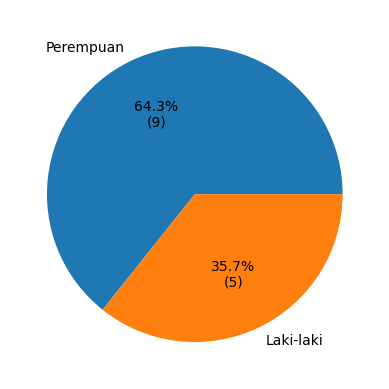

In [6]:
s = dfE.JK.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

<Figure size 1200x800 with 0 Axes>

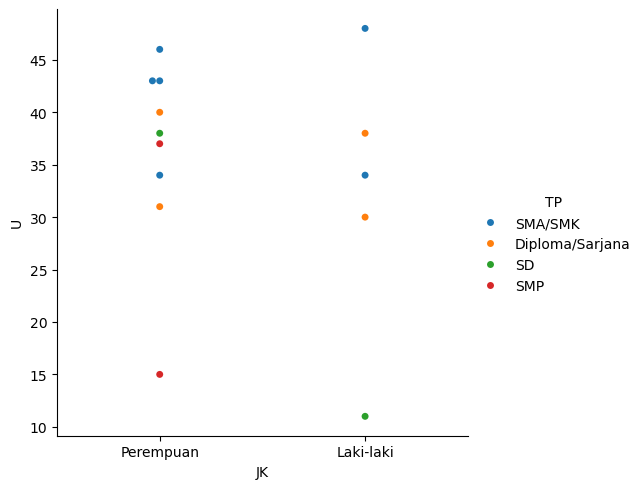

In [7]:
plt.figure(figsize=(12,8))
sns.catplot(x="JK", y="U", hue="TP", kind="swarm", data=dfE)
plt.show()

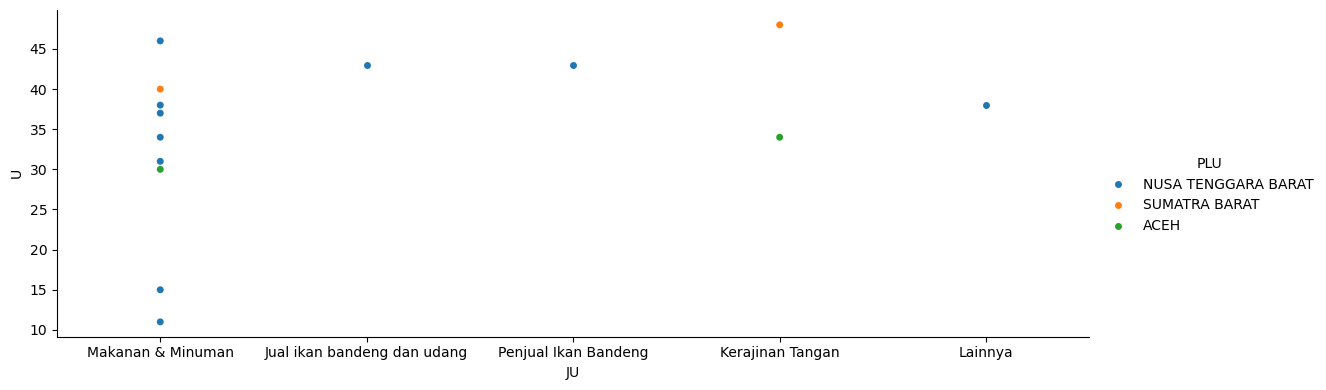

In [8]:
sns.catplot(x="JU", y="U", hue="PLU", kind="swarm", data=dfE, height=4, aspect=2.8)
plt.show()

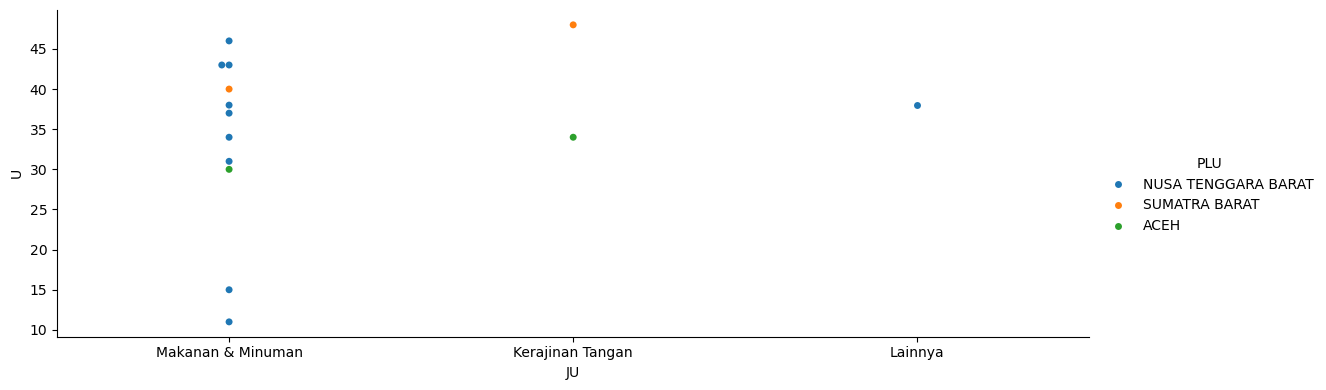

In [9]:
dfE.loc[(dfE['JU'] == 'Jual ikan bandeng dan udang'), "JU"] = "Makanan & Minuman"
dfE.loc[(dfE['JU'] == 'Penjual Ikan Bandeng'), "JU"] = "Makanan & Minuman"
sns.catplot(x="JU", y="U", hue="PLU", kind="swarm", data=dfE, height=4, aspect=2.8)
plt.show()

## Kesan E.01:

* Umur di instrumen ini numerik, di instrumen lain kategorik (selang interval)
    * penulisan umur ada inkonsistensi di data, ada yang menulis "15 tahun" dan ada yang cuma angka "15". Saya perbaiki langsung di data.
* Terdapat noise di data : Rohit firmansyah	11 tahun	Laki-laki	SD	Makanan & Minuman
* Nilai "Jual Ikan bandeng dan Udang" dan "Penjual ikan Bandeng" seharusnya "Makanan dan Minuman"
* "Jenis UMKM" juga ada yg isi "Lainnya" dan bukan informasi yang sebenarnya.
* Secara umum paling banyak responden "wanita" berumur ">30 tahun" menggunakan fasilitas bakti untuk UMKM jenis "Makanan & Minuman"

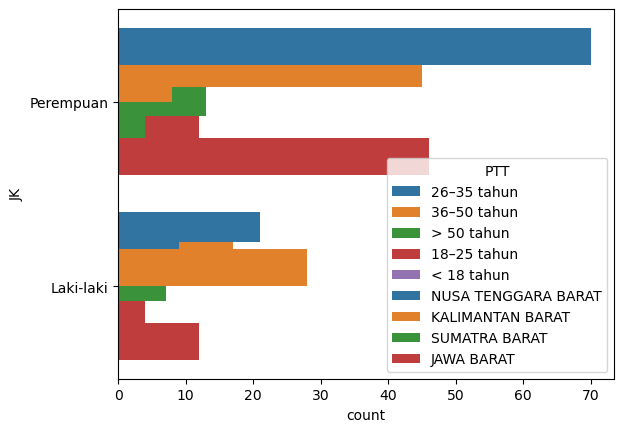

In [11]:
#p = mosaic(dfK, ['U', 'JK', 'PTT'])
ax = sns.countplot(y='JK', hue='U', data=dfK)
ax = sns.countplot(y='JK', hue='PTT', data=dfK)

In [12]:
dfS.describe(include="all")

,Umur,U,Tingkat Pendidikan,Pekerjaan Utama,TP,PU,Apakah anda punya perangkat elektronik ?,Perangkat yang Anda gunakan untuk mengakses internet,Dari mana Anda mendapatkan akses internet ?,Kualitas akses internet di lokasi Anda:,...,"Media sosial (Facebook, Instagram, dll)","Situs berita online (detik.com, kompas.com, dll)",Blog atau artikel pribadi,Situs resmi pemerintah atau institusi,"Forum diskusi online (Reddit, Kaskus, dll)","Apakah akses internet telah membantu Anda berbagi informasi dengan orang lain (keluarga, teman, komunitas)?",Apakah akses informasi melalui internet meningkatkan partisipasi Anda dalam kegiatan sosial atau komunitas?,Menyelesaikan pekerjaan atau tugas dengan lebih cepat,Berkontribusi pada diskusi atau forum online,"Meningkatkan pemahaman tentang isu-isu sosial (e.g., lingkungan, kesehatan, politik)"
count,98,98,98,98,98,98,98,98,98,98,...,98.000000,98.000000,98.000000,98.000000,98.000000,98,98,98.000000,98.000000,98.000000
unique,42,2,5,30,5,5,2,7,11,4,...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN
top,34,Laki-laki,SMA/SMK,Wirausaha,ACEH,ACEH BESAR,Ya,Smartphone,Data Seluler,Cukup baik,...,NaN,NaN,NaN,NaN,NaN,"Ya, sangat membantu",Ya,NaN,NaN,NaN
freq,8,58,46,20,54,54,97,90,60,51,...,NaN,NaN,NaN,NaN,NaN,81,94,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.683673,3.877551,3.448980,4.204082,3.581633,NaN,NaN,4.336735,4.204082,4.336735
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.011245,0.922405,1.104092,0.836773,1.054431,NaN,NaN,0.951871,0.962805,0.836585
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,1.000000,1.000000,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,3.000000,4.000000,3.000000,NaN,NaN,4.000000,4.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,3.000000,4.000000,3.000000,NaN,NaN,5.000000,5.000000,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,5.000000,4.000000,5.000000,4.000000,NaN,NaN,5.000000,5.000000,5.000000


In [13]:
p = dfS.JK.value_counts().plot(kind='pie')

AttributeError: 'DataFrame' object has no attribute 'JK'

In [ ]:
p = dfS.U.value_counts().plot(kind='pie')

In [ ]:
p = dfS.Psp.value_counts().plot(kind='pie')

In [ ]:
#p = mosaic(dfK, ['U', 'JK', 'Psp'])
ax = sns.countplot(y='JK', hue='Psp', data=dfS)

In [ ]:
ax = sns.countplot(y='JK', hue='U', data=dfS)

In [ ]:
dfG.describe(include="all")

In [ ]:
p = dfG.Psalp.value_counts().plot(kind='pie')